# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

1.   Inisiasi jumlah kluster secara random, misalkan kita pilih k=2. K adalah sebuah parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan.
2.   Tentukan posisi centroid secara random.
3.   Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance. 
4.   Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
5.   Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 




---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('drive/My Drive/Bootcamp Data Science Python/dataset/pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










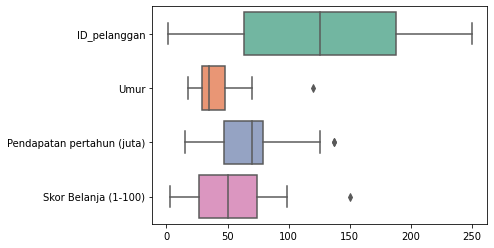

In [ ]:
#code here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#handling missing value
df.fillna(method="ffill", axis=0, inplace=True)

#melihat kolom apa saja yg terdapat outlier
ax = sns.boxplot(data=df, orient="h", palette="Set2")




In [ ]:
# Mencari lower dan upper bound
def get_lower_upper(x):
  Q1 = np.percentile(x, 25)
  Q3 = np.percentile(x, 75)

  IQR = Q3 - Q1

  lowerBound = Q1 - (1.5 * IQR)
  upperBound = Q3 + (1.5 * IQR)
  return lowerBound, upperBound

# Mencari IQR
def get_outlier_iqr(x):
  lowerBound, upperBound = get_lower_upper(x)
  return x[np.where((x < lowerBound) | (x > upperBound))]

print(get_outlier_iqr(df['Umur'].values))
print(get_outlier_iqr(df['Pendapatan pertahun (juta)'].values))
print(get_outlier_iqr(df['Skor Belanja (1-100)'].values))


[120.]
[137 137]
[150.]


In [ ]:
# Handling outlier

def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>((Q3+(1.5*IQR)))))]
  return df_final

df_removed_outlier = remove_outlier(df[['Umur','Skor Belanja (1-100)']])
df_removed_outlier.dropna(axis=0, inplace=True)
df_removed_outlier

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
244,27.0,69.0
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0


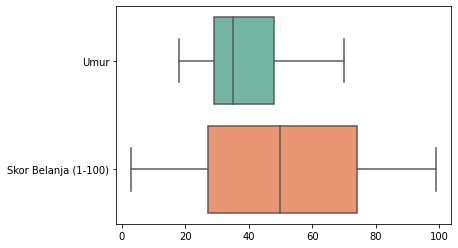

In [ ]:
ax = sns.boxplot(data=df_removed_outlier, orient="h", palette="Set2")


In [ ]:
# Rescaling data

sc = StandardScaler()
df_rem_outlier_rescaled = sc.fit_transform(df_removed_outlier)

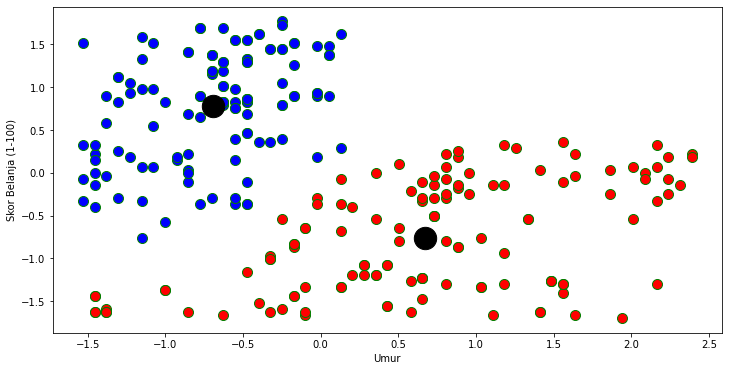

In [ ]:
# Clustering K-Means, k=2

c_kmeans = KMeans(n_clusters=2, random_state=50).fit(df_rem_outlier_rescaled)
c_labels = c_kmeans.labels_

new_df = pd.DataFrame(data = df_rem_outlier_rescaled, columns=['Umur','Skor Belanja (1-100)'])
new_df['label_kmeans'] = c_labels

plt.subplots(figsize=(12,6))
plt.scatter(new_df.Umur[new_df.label_kmeans == 0], new_df['Skor Belanja (1-100)'][new_df.label_kmeans == 0], c='b',s=100, edgecolor='g')
plt.scatter(new_df.Umur[new_df.label_kmeans == 1], new_df['Skor Belanja (1-100)'][new_df.label_kmeans == 1], c='r',s=100, edgecolor='g')

center = c_kmeans.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

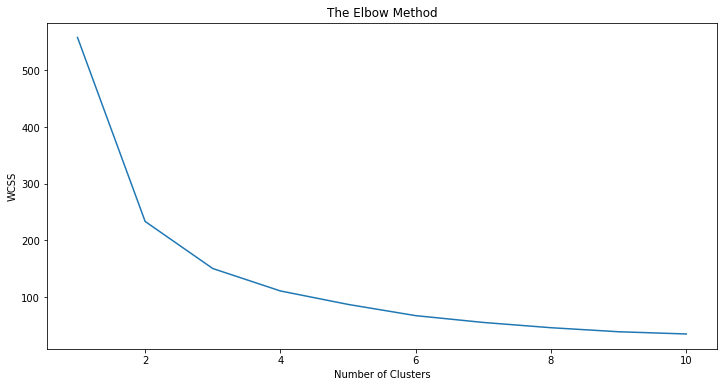

In [ ]:
# Elbow method graph

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

plt.subplots(figsize=(12,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

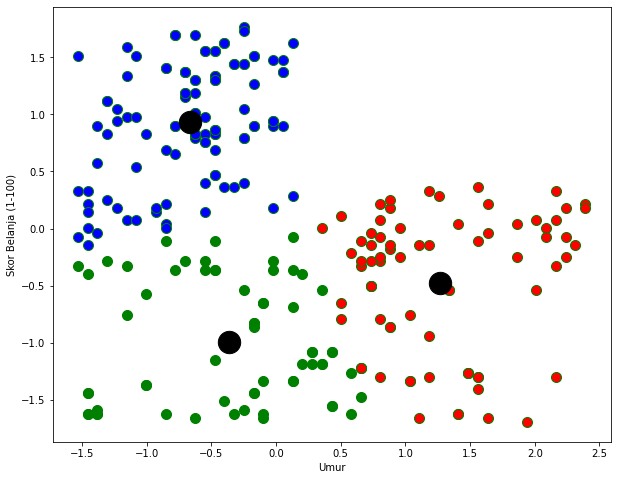

In [ ]:
# K-Means, k=3

c_kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=50).fit(df_rem_outlier_rescaled)
c_labels2 = c_kmeans_3.labels_

new_df['label_kmeans_2'] = c_labels2

plt.subplots(figsize=(10,8))
plt.scatter(new_df.Umur[new_df.label_kmeans_2 == 0], new_df['Skor Belanja (1-100)'][new_df.label_kmeans_2 == 0], c='g',s=100, edgecolor='g')
plt.scatter(new_df.Umur[new_df.label_kmeans_2 == 1], new_df['Skor Belanja (1-100)'][new_df.label_kmeans_2 == 1], c='b',s=100, edgecolor='g')
plt.scatter(new_df.Umur[new_df.label_kmeans_2 == 2], new_df['Skor Belanja (1-100)'][new_df.label_kmeans_2 == 2], c='r',s=100, edgecolor='g')

center = c_kmeans_3.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()


In [ ]:
# Silhouette Score

from sklearn.metrics import silhouette_score

print('silhouette score n-cluster=2: ',silhouette_score(new_df, labels=c_labels))
print('silhouette score n-cluster=3: ',silhouette_score(new_df, labels=c_labels2))

silhouette score n-cluster=2:  0.4735164965207101
silhouette score n-cluster=3:  0.5984936448714288


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Pada clustering pertama dengan n_cluster = 2, terlihat segmentasi bahwa pelanggan yang semakin tua Umurnya memiliki kencederungan untuk membeli barang lebih sedikit dibandingkan dengan pelanggan yg lebih muda Umurnya.

Pada clustering kedua dengan n_cluster = 3, segmentasi Pelanggan terlihat lebih mendetail. Dimana segmentasi(clustering) dibagi menjadi 3, yaitu:
*   Kluster pertama adalah pelanggan yg memiliki Umur muda dan skor pembelian yang paling sedikit.
*   Kluster kedua adalah pelanggan yg memiliki Umur muda dan skor pembelian yang tinggi.
*   Kluster ketiga adalah pelanggan yg memiliki Umur lebih Tua dan skor pembelian yang sedikit.

Dari Klustering data umur pelanggan dan skor pembelian tersebut, dapat diambil kesimpulan bahwa pelanggan yg berusia muda memiliki kecenderungan untuk membeli barang yang lebih banyak dibandingkan pelanggan yg berumur lebih tua. Sehingga Supermarket dapat memberikan fokus yang lebih terhadap pelanggan yg berumur lebih muda, untuk meningkatkan angka pembelian pelanggan di supermarket tersebut.